# Analyzing the complexity of algorithms

Algorithms can be analyzed for their complexyty and as such grant an insight how the running time of the program depends on the size of the input `n`.

First we need a timer to time the execution time of our algorithm. For that we use the `timer` module. We also need the array instances `n` and for that use numpy. For plotting the measurements we can use matplotlib.

In [101]:
import time
import numpy as np
import matplotlib.pyplot as plt
import math

Now we can define our function that we want to analyze:

In [102]:
def f(A, n) -> int:
    if(n == 0):
        return 0
    s:int = 0
    for i in range(n):
        s = s + A[i]
    s = s + f(A, math.floor(n/2))
    return s

The complexity of any function can be analyzed by measuring the time it takes to execute the function and then by making the input of the function bigger with every subsequent function call. This an be achived by the following `complexity` function:

In [103]:
def analyzeComplexity(f: callable, n:list[float]):
    countMeasurements = len(n)
    measurements = np.arange(countMeasurements, dtype=float)

    print("Analyzing function complexity. Progress:")
    print("[", end='')
    for i in range(countMeasurements):
        print("-", end='')
    print("]")

    print("[", end='')
    for i in range(countMeasurements):
        A = np.full([n[i]], 1)
        startTime = time.time()
        sum = f(A, n[i])
        endTime = time.time()
        dT = endTime - startTime
        measurements[i] = dT
        print("*", end='')
    print("]")

    return (n, measurements)

Using all the above defined we can now analyze the compexities of functions and compare them to what we think the complexities are:

n: [100000, 215443, 464158, 1000000, 2154434, 4641588, 10000000, 21544346, 46415888, 100000000]
Analyzing function complexity. Progress:
[----------]
[**********]


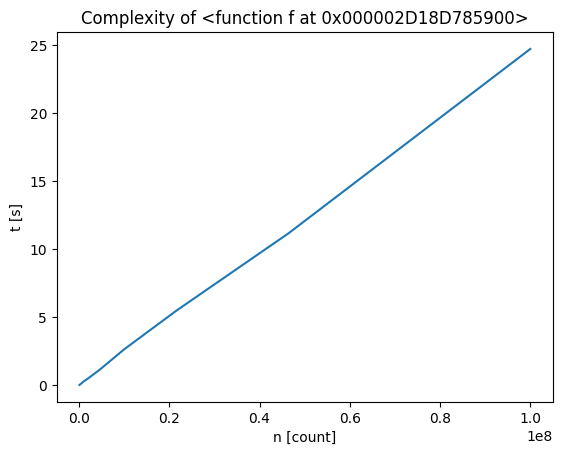

In [104]:
n: list[float] = [math.floor(10 ** (i/3)) for i in range(15, 25)]
print("n: ", end='')
print(n)

xCompl, yCompl = analyzeComplexity(f, n)
plt.plot(xCompl, yCompl)
plt.title("Complexity of " + str(f))
plt.xlabel("n [count]")
plt.ylabel("t [s]")
plt.show()